In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from scipy.stats import skew

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('../data/GiveMeSomeCredit-training.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [5]:
df = df.drop(["Unnamed: 0"], axis=1)

In [6]:
df.columns.to_list()

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [7]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## EDA start

### Target variable SeriousDlqin2years

We can see we are dealing with significant target feature imbalance in traning data (14:1).

In [9]:
df["SeriousDlqin2yrs"].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

### Feature "RevolvingUtilizationOfUnsecuredLines"

Huge outliers present.

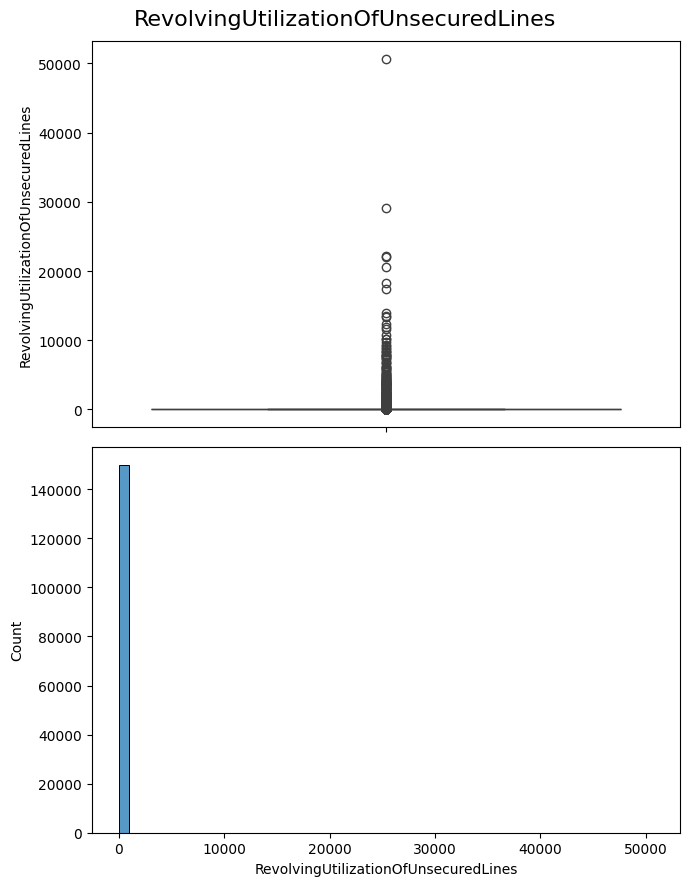

In [10]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))
f.suptitle('RevolvingUtilizationOfUnsecuredLines', fontsize=16)

sns.boxplot(df["RevolvingUtilizationOfUnsecuredLines"], ax=axes[0])
sns.histplot(df["RevolvingUtilizationOfUnsecuredLines"], bins=50, ax=axes[1])

plt.tight_layout()
plt.show()


### Age

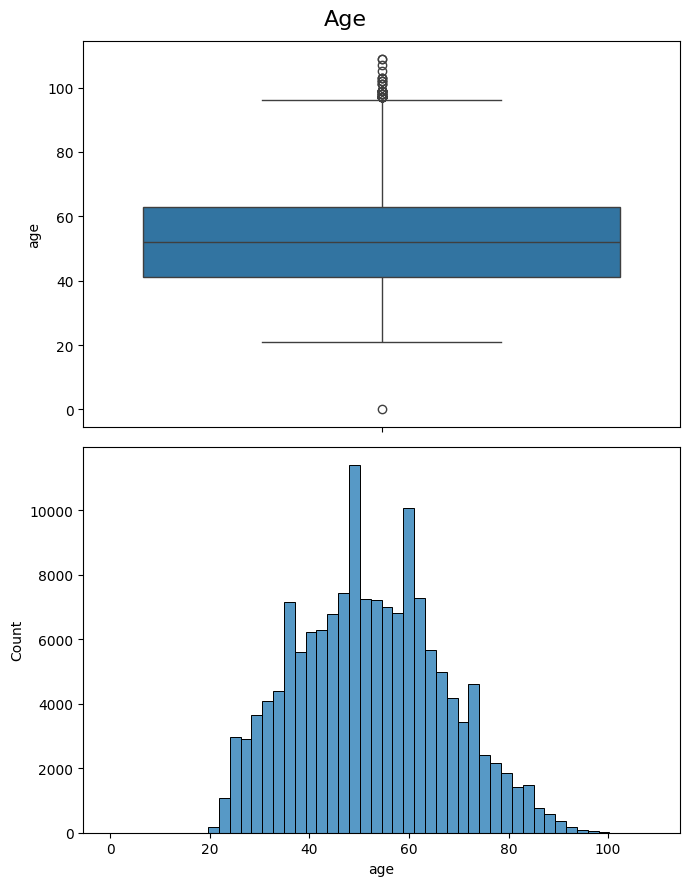

In [11]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))
f.suptitle('Age', fontsize=16)

sns.boxplot(df["age"], ax=axes[0])
sns.histplot(df["age"], bins=50, ax=axes[1])

plt.tight_layout()
plt.show()

### DebtRatio

Massive outliers again. We will have to remove them later.

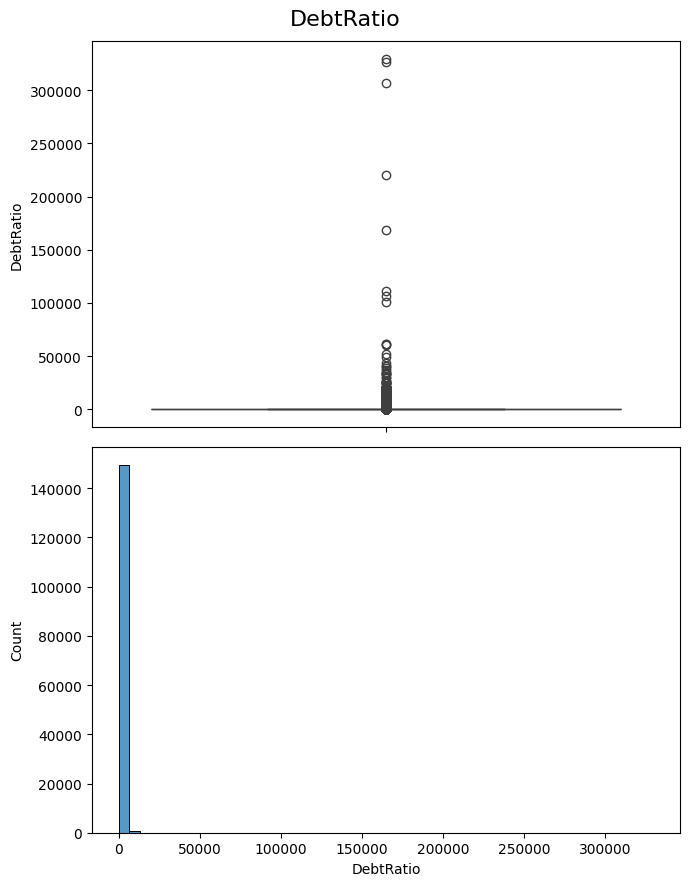

In [12]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))
f.suptitle('DebtRatio', fontsize=16)

sns.boxplot(df["DebtRatio"], ax=axes[0])
sns.histplot(df["DebtRatio"], bins=50, ax=axes[1])

plt.tight_layout()
plt.show()

### MonthlyIncome

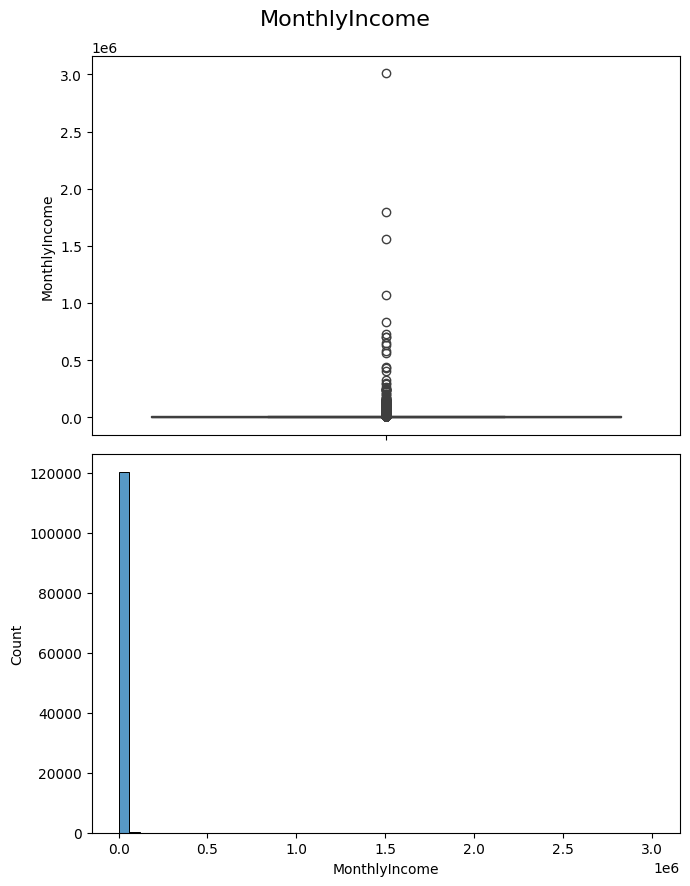

In [13]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))
f.suptitle('MonthlyIncome', fontsize=16)

sns.boxplot(df["MonthlyIncome"], ax=axes[0])
sns.histplot(df["MonthlyIncome"], bins=50, ax=axes[1])

plt.tight_layout()
plt.show()

### NumberOfOpenCreditLinesAndLoans

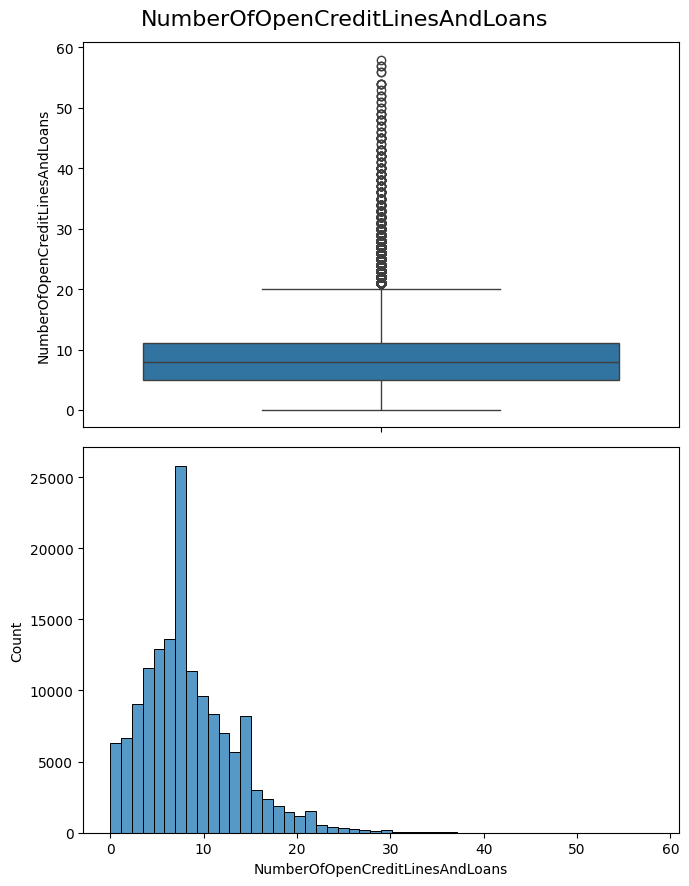

In [14]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))
f.suptitle('NumberOfOpenCreditLinesAndLoans', fontsize=16)

sns.boxplot(df["NumberOfOpenCreditLinesAndLoans"], ax=axes[0])
sns.histplot(df["NumberOfOpenCreditLinesAndLoans"], bins=50, ax=axes[1])

plt.tight_layout()
plt.show()

### NumberRealEstateLoansOrLines

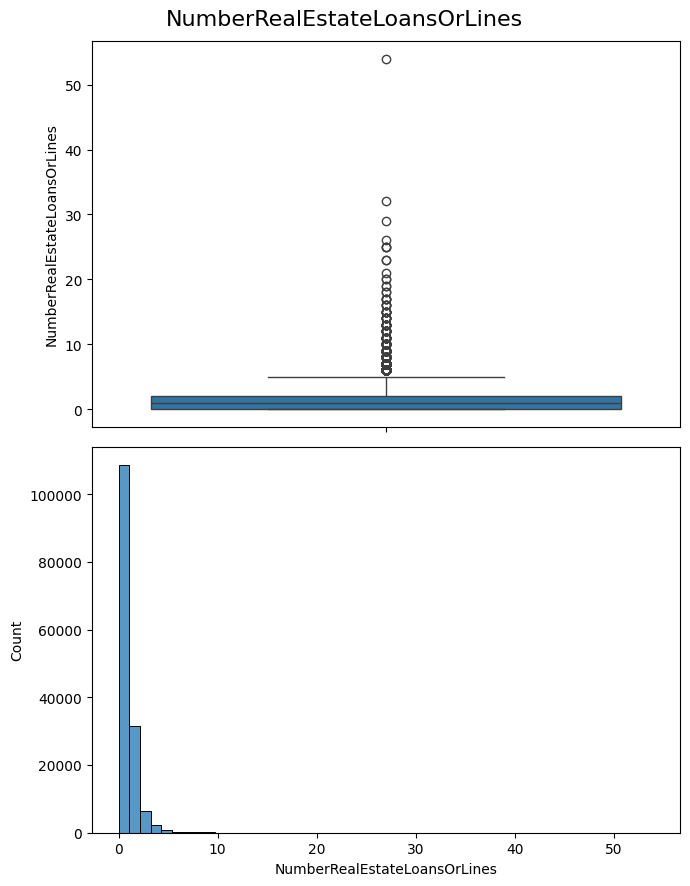

In [15]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))
f.suptitle('NumberRealEstateLoansOrLines', fontsize=16)

sns.boxplot(df["NumberRealEstateLoansOrLines"], ax=axes[0])
sns.histplot(df["NumberRealEstateLoansOrLines"], bins=50, ax=axes[1])

plt.tight_layout()
plt.show()

### NumberOfDependants

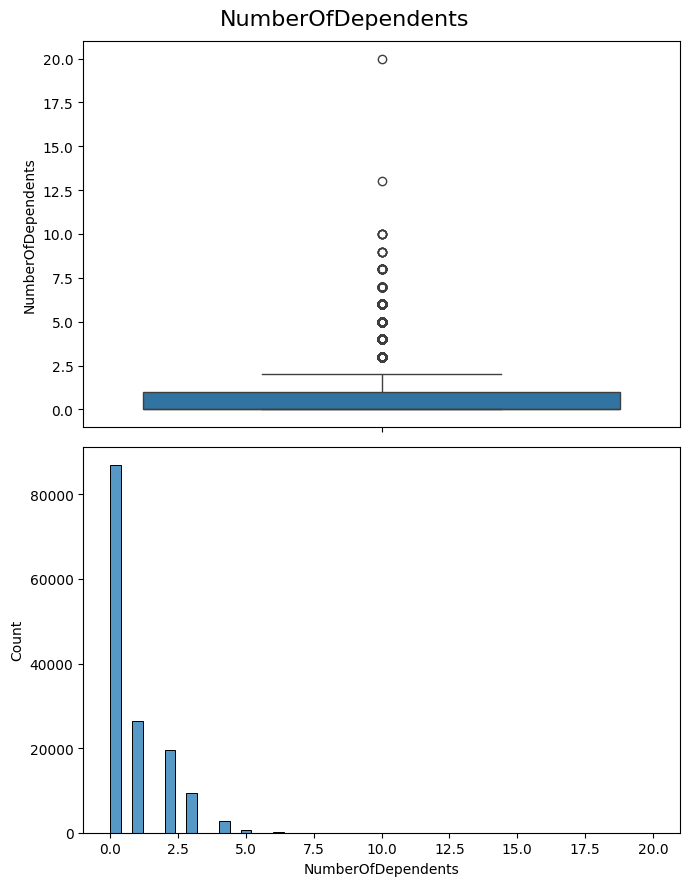

In [16]:
f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 9))
f.suptitle('NumberOfDependents', fontsize=16)

sns.boxplot(df["NumberOfDependents"], ax=axes[0])
sns.histplot(df["NumberOfDependents"], bins=50, ax=axes[1])

plt.tight_layout()
plt.show()

## Heatmap and correlation

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


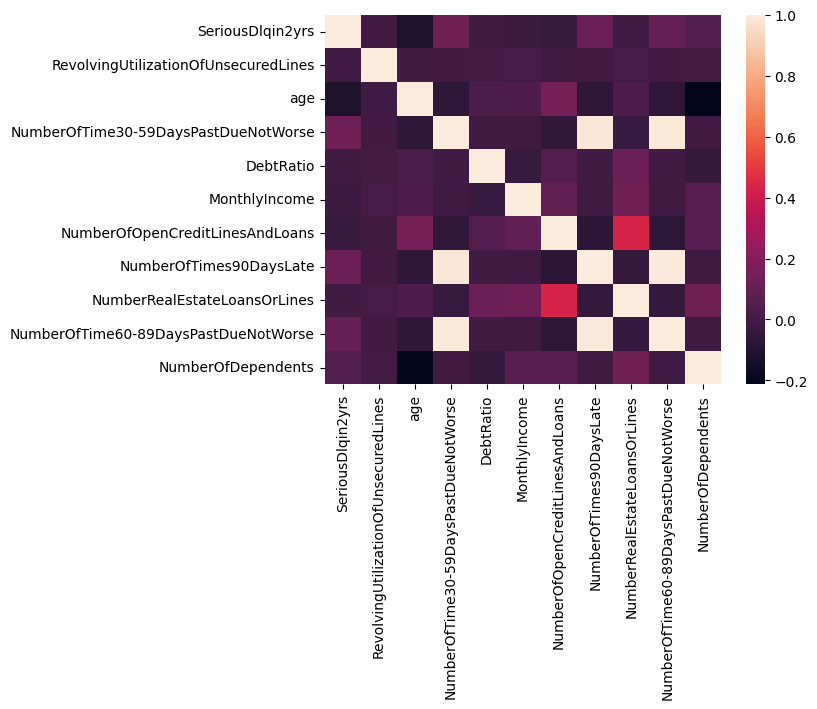

In [17]:
sns.heatmap(df.corr())
df.corr()

## PCA (analysis)

Let's perform PCA analysis on current data.

In [18]:
input_features = df[[
    'RevolvingUtilizationOfUnsecuredLines',
    'age',
    'NumberOfTime30-59DaysPastDueNotWorse',
    'DebtRatio',
    'MonthlyIncome',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberOfTimes90DaysLate',
    'NumberRealEstateLoansOrLines',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfDependents'
]]

target_feature = df['SeriousDlqin2yrs']

n_PCA_features = 10

In [19]:
imputer = SimpleImputer()
input_features = imputer.fit_transform(input_features)

In [20]:
scaler = MinMaxScaler()
input_features = scaler.fit_transform(input_features)

5 PCA components will be calculated and their impact shown.

In [21]:
pca = PCA(n_components=5)

input_features = pca.fit_transform(input_features)

input_features = pd.DataFrame(input_features, 
                              columns=[
                                    "COL_1",
                                    "COL_2",
                                    "COL_3",
                                    "COL_4",
                                    "COL_5"
                              ], 
                              index=df.index)

[0.53468902 0.2210513  0.15072533 0.08015977 0.00987159]


<Axes: >

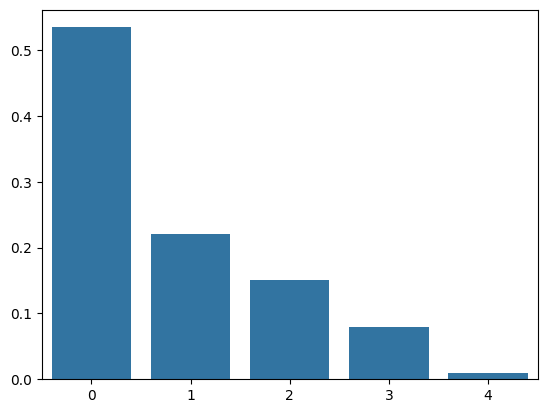

In [22]:
print(pca.explained_variance_ratio_)
sns.barplot(pca.explained_variance_ratio_)

In [23]:
df_pca = pd.concat([input_features, target_feature], axis=1)

df_pca.head()

,COL_1,COL_2,COL_3,COL_4,COL_5,SeriousDlqin2yrs
0,-0.058255,0.102299,0.017535,0.048579,0.080827,1
1,-0.124021,-0.056464,-0.020212,0.006759,-0.011412,0
2,-0.143463,-0.094502,-0.013920,-0.040853,-0.005837,0
3,-0.206675,-0.031636,-0.019392,-0.054599,-0.011436,0
4,-0.030149,-0.023939,-0.003833,-0.038064,0.004074,0


The following graph shows correlation between two most impactful PCA components and target variable.

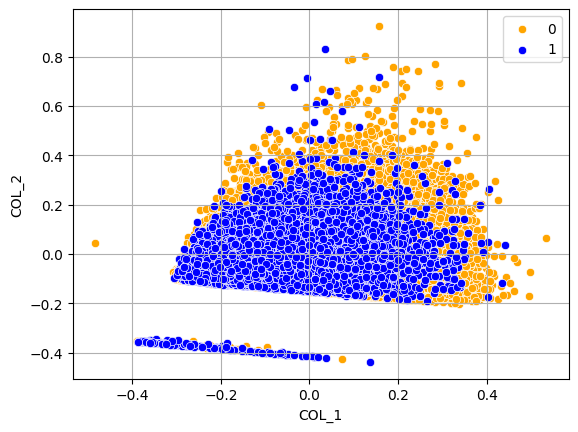

In [24]:
targets = [0, 1]
colors = ['orange', 'blue']

f, ax = plt.subplots(1, 1)

for target, color in zip(targets,colors):
    sns.scatterplot(
        x = df_pca.loc[df_pca['SeriousDlqin2yrs'] == target, 'COL_1'], 
        y = df_pca.loc[df_pca['SeriousDlqin2yrs'] == target, 'COL_2'], 
        color = color,
        ax = ax
    )

ax.legend(targets)
ax.grid()
plt.show()